In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
%cd C:\\Users\\kanika2\\12AprilBatch\\Advance Case Study\\9. End to End Foundation Case Study-1

C:\Users\kanika2\12AprilBatch\Advance Case Study\9. End to End Foundation Case Study-1


In [2]:
#importing file

In [3]:
inpatient=pd.read_csv("Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv")

In [4]:
outpatient=pd.read_csv("Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv")

In [5]:
inpatient.head() #top 5

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333,4851.444444


In [6]:
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   DRG Definition                              163065 non-null  object 
 1   Provider Id                                 163065 non-null  int64  
 2   Provider Name                               163065 non-null  object 
 3   Provider Street Address                     163065 non-null  object 
 4   Provider City                               163065 non-null  object 
 5   Provider State                              163065 non-null  object 
 6   Provider Zip Code                           163065 non-null  int64  
 7   Hospital Referral Region (HRR) Description  163065 non-null  object 
 8   Total Discharges                            163065 non-null  int64  
 9   Average Covered Charges                     163065 non-null  float64
 

In [7]:
inpatient.describe().T

,count,mean,std,min,25%,50%,75%,max
Provider Id,163065.0,255569.865428,151563.671767,10001.000000,110092.000000,250007.000000,380075.00000,670077.0000
Provider Zip Code,163065.0,47938.121908,27854.323080,1040.000000,27261.000000,44309.000000,72901.00000,99835.0000
Total Discharges,163065.0,42.776304,51.104042,11.000000,17.000000,27.000000,49.00000,3383.0000
Average Covered Charges,163065.0,36133.958434,35065.365905,2459.400000,15947.166670,25245.823530,43232.59259,929118.9091
Average Total Payments,163065.0,9707.477867,7664.642652,2673.000000,5234.500000,7214.100000,11286.40000,156158.1818
Average Medicare Payments,163065.0,8494.495174,7309.467247,1148.909091,4192.354839,6158.465116,10056.88235,154620.8182


In [8]:
outpatient.head()

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853
2,0012 - Level I Debridement & Destruction,30064,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1501 NORTH CAMPBELL AVENUE,TUCSON,AZ,85724,AZ - Tucson,1765,50.135411,14.541841
3,0012 - Level I Debridement & Destruction,30088,BANNER BAYWOOD MEDICAL CENTER,6644 EAST BAYWOOD AVENUE,MESA,AZ,85206,AZ - Mesa,20,112.400000,23.736000
4,0012 - Level I Debridement & Destruction,30111,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",2800 EAST AJO WAY,TUCSON,AZ,85713,AZ - Tucson,22,152.045455,16.569091


In [9]:
outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   APC                                         43372 non-null  object 
 1   Provider Id                                 43372 non-null  int64  
 2   Provider Name                               43372 non-null  object 
 3   Provider Street Address                     43372 non-null  object 
 4   Provider City                               43372 non-null  object 
 5   Provider State                              43372 non-null  object 
 6   Provider Zip Code                           43372 non-null  int64  
 7   Hospital Referral Region (HRR) Description  43372 non-null  object 
 8   Outpatient Services                         43372 non-null  int64  
 9   Average  Estimated Submitted Charges        43372 non-null  float64
 10  Average To

In [10]:
outpatient.describe().T

,count,mean,std,min,25%,50%,75%,max
Provider Id,43372.0,265410.921747,152729.927698,10001.00000,140043.000000,260091.000000,390101.000000,670061.000000
Provider Zip Code,43372.0,49041.022434,27497.899751,1040.00000,28645.000000,46342.000000,73101.000000,99801.000000
Outpatient Services,43372.0,587.980955,3280.397168,11.00000,42.000000,128.000000,347.000000,219042.000000
Average Estimated Submitted Charges,43372.0,1473.994047,1837.530791,12.64375,284.610498,709.995188,2102.121346,32105.636360
Average Total Payments,43372.0,265.425586,261.260146,7.30500,74.627714,139.298570,394.211316,2062.470526


# PROBLEM :

In [11]:
#Part1: Identify providers that overcharge for certain procedures or regions where procedures are too expensive.

In [12]:
#Part 1A: Highest Cost Variation

In [13]:
a=inpatient[['DRG Definition','Provider State','Average Medicare Payments']]
a.head()

,DRG Definition,Provider State,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4851.444444


In [14]:
amax=a.loc[a.groupby(['DRG Definition','Provider State'])['Average Medicare Payments'].idxmax()].reset_index(drop=True)
amin=a.loc[a.groupby(['DRG Definition','Provider State'])['Average Medicare Payments'].idxmin()].reset_index(drop=True)
print(amax)
print(amin)

                                DRG Definition Provider State  \
0     039 - EXTRACRANIAL PROCEDURES W/O CC/MCC             AK   
1     039 - EXTRACRANIAL PROCEDURES W/O CC/MCC             AL   
2     039 - EXTRACRANIAL PROCEDURES W/O CC/MCC             AR   
3     039 - EXTRACRANIAL PROCEDURES W/O CC/MCC             AZ   
4     039 - EXTRACRANIAL PROCEDURES W/O CC/MCC             CA   
...                                        ...            ...   
5020            948 - SIGNS & SYMPTOMS W/O MCC             VT   
5021            948 - SIGNS & SYMPTOMS W/O MCC             WA   
5022            948 - SIGNS & SYMPTOMS W/O MCC             WI   
5023            948 - SIGNS & SYMPTOMS W/O MCC             WV   
5024            948 - SIGNS & SYMPTOMS W/O MCC             WY   

      Average Medicare Payments  
0                   6413.782609  
1                   5858.500000  
2                   8533.833333  
3                   9056.066667  
4                  11483.407410  
...            

In [15]:
a1=amax.copy()
a1['Variation']=amax['Average Medicare Payments']-amin['Average Medicare Payments']
del a1['Average Medicare Payments']
a1.loc[a1.groupby(['DRG Definition'])['Variation'].idxmax()].head()

,DRG Definition,Provider State,Variation
20,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MD,11506.646106
55,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,CA,18335.419643
122,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,MD,40323.965461
157,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA,17437.811237
208,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA,9972.780745


In [16]:
#For outpatient
a=outpatient[['APC','Provider State','Average Total Payments']]
a.head()

,APC,Provider State,Average Total Payments
0,0012 - Level I Debridement & Destruction,AL,21.910435
1,0012 - Level I Debridement & Destruction,AK,36.623853
2,0012 - Level I Debridement & Destruction,AZ,14.541841
3,0012 - Level I Debridement & Destruction,AZ,23.736000
4,0012 - Level I Debridement & Destruction,AZ,16.569091


In [17]:
amax=a.loc[a.groupby(['APC','Provider State'])['Average Total Payments'].idxmax()].reset_index(drop=True)
amin=a.loc[a.groupby(['APC','Provider State'])['Average Total Payments'].idxmin()].reset_index(drop=True)

In [18]:
a1=amax.copy()
a1['Variation']=amax['Average Total Payments']-amin['Average Total Payments']
del a1['Average Total Payments']
a1.loc[a1.groupby(['APC'])['Variation'].idxmax()].head()

,APC,Provider State,Variation
20,0012 - Level I Debridement & Destruction,MI,20.593261
51,0013 - Level II Debridement & Destruction,CA,47.025556
101,0015 - Level III Debridement & Destruction,CA,83.536505
175,0019 - Level I Excision/ Biopsy,NY,180.010667
194,0020 - Level II Excision/ Biopsy,CA,296.625625


In [19]:
# Finding Standard deviation and mean for InpatientDRG
Medicare_IN = pd.concat(
[inpatient[['DRG Definition','Average Covered Charges']].groupby(['DRG Definition']).agg('std').add_suffix('_std'),
 inpatient[['DRG Definition','Average Covered Charges']].groupby(['DRG Definition']).agg('mean').add_suffix('_avg')]
 , axis =1)
Medicare_IN.head()

,Average Covered Charges_std,Average Covered Charges_avg
DRG Definition,,
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,15941.252060,30481.989332
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC,14085.285662,24307.762697
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC,29593.224554,48552.613451
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC,16732.402730,29492.125031
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC,12606.452651,23592.928898


In [20]:
# Findinng Coefficient of Variance, the standard deviation divided by the mean
Medicare_IN['Variation'] = Medicare_IN.apply(lambda x: x['Average Covered Charges_std']/x['Average Covered Charges_avg'],axis =1)

In [21]:
Medicare_IN.head(1)

,Average Covered Charges_std,Average Covered Charges_avg,Variation
DRG Definition,,,
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,15941.25206,30481.989332,0.522973


In [22]:
Medicare_IN['Variation'].nlargest(5)

DRG Definition
885 - PSYCHOSES                                                              0.717796
897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC    0.633967
917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC                               0.613150
190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC                            0.610374
189 - PULMONARY EDEMA & RESPIRATORY FAILURE                                  0.610107
Name: Variation, dtype: float64

In [23]:
# Finding Standard deviation and mean for OutpatientDRG
Medicare_OUT = pd.concat(
[outpatient[["APC","Average  Estimated Submitted Charges"]].groupby(['APC']).agg('std').add_suffix('_std'),
outpatient[["APC","Average  Estimated Submitted Charges"]].groupby(['APC']).agg('mean').add_suffix('_avg')],
axis =1)
Medicare_OUT.head(1)

,Average Estimated Submitted Charges_std,Average Estimated Submitted Charges_avg
APC,,
0012 - Level I Debridement & Destruction,95.646537,91.084383


In [24]:
# Finding Coefficient of Variance, the standard deviation divided by the mean
Medicare_OUT['Variation'] = Medicare_OUT.apply(lambda x: x['Average  Estimated Submitted Charges_std']/x['Average  Estimated Submitted Charges_avg'],axis =1)

In [25]:
Medicare_OUT['Variation'].nlargest(5)

APC
0604 - Level 1 Hospital Clinic Visits             1.385150
0698 - Level II Eye Tests & Treatments            1.310444
0019 - Level I Excision/ Biopsy                   1.229897
0692 - Level II Electronic Analysis of Devices    1.128166
0012 - Level I Debridement & Destruction          1.050087
Name: Variation, dtype: float64

In [26]:
#Part1: B: Highest-Cost Claims by Provider

In [27]:
inpatient.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region (HRR) Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')

In [28]:
#For inpatient
b=inpatient[['DRG Definition','Provider Id','Average Medicare Payments']]
b.head()

,DRG Definition,Provider Id,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,4851.444444


In [29]:
bmax=b.loc[b.groupby(['DRG Definition','Provider Id'])['Average Medicare Payments'].idxmax()].reset_index(drop=True)
bmax.loc[bmax.groupby(['DRG Definition'])['Average Medicare Payments'].idxmax()].head()

,DRG Definition,Provider Id,Average Medicare Payments
456,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210029,15855.18182
1554,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,210009,22873.49398
2986,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,210009,48632.28125
4156,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50228,23402.26316
6365,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50228,13710.23529


In [30]:
#Finding the max of Average Covered Charges for InpatientDRG
b1 = pd.DataFrame(inpatient[['DRG Definition', 'Average Covered Charges']].groupby(
    ['DRG Definition']).agg('max').add_suffix('_max')).reset_index()
b1.head()

,DRG Definition,Average Covered Charges_max
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,146892.0000
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,148128.4375
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,234912.7000
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,162922.5000
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,117831.1429


In [31]:
#Merging the max value with InpatientDRG dataset
b1m = inpatient.merge(b1,on='DRG Definition', how='left')
b1m.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Average Covered Charges_max
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264,146892.0
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286,146892.0
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667,146892.0
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000,4129.160000,146892.0
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333,4851.444444,146892.0


In [32]:
#function to get the max indicator
def diff(b1m):
    if ((b1m['Average Covered Charges_max']  == b1m['Average Covered Charges'])):
        return 1
    else:
        return 0

In [33]:
b1m['MAX'] = b1m.apply(diff, axis=1)

In [34]:
#getting number of times a provider has charge max value for procedure
max_value= pd.DataFrame(b1m[['Provider Name','MAX']].groupby(['Provider Name']).agg('sum').add_suffix('_sum'),)
max_value['MAX_sum'].nlargest(5)

Provider Name
BAYONNE HOSPITAL CENTER          23
CROZER CHESTER MEDICAL CENTER    11
STANFORD HOSPITAL                10
HAHNEMANN UNIVERSITY HOSPITAL     7
DOCTORS MEDICAL CENTER            5
Name: MAX_sum, dtype: int64

In [35]:
#For outpatient
outpatient.columns

Index(['APC', 'Provider Id', 'Provider Name', 'Provider Street Address',
       'Provider City', 'Provider State', 'Provider Zip Code',
       'Hospital Referral Region (HRR) Description', 'Outpatient Services',
       'Average  Estimated Submitted Charges', 'Average Total Payments'],
      dtype='object')

In [36]:
b=outpatient[['APC','Provider Id','Average Total Payments']]
b.head()

,APC,Provider Id,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,21.910435
1,0012 - Level I Debridement & Destruction,20024,36.623853
2,0012 - Level I Debridement & Destruction,30064,14.541841
3,0012 - Level I Debridement & Destruction,30088,23.736000
4,0012 - Level I Debridement & Destruction,30111,16.569091


In [37]:
bmax=b.loc[b.groupby(['APC','Provider Id'])['Average Total Payments'].idxmax()].reset_index(drop=True)
bmax.loc[bmax.groupby(['APC'])['Average Total Payments'].idxmax()].head()

,APC,Provider Id,Average Total Payments
1,0012 - Level I Debridement & Destruction,20024,36.623853
424,0013 - Level II Debridement & Destruction,50334,85.930000
1874,0015 - Level III Debridement & Destruction,50153,142.186505
3322,0019 - Level I Excision/ Biopsy,50002,470.720000
3837,0020 - Level II Excision/ Biopsy,50153,808.850000


In [38]:
#Finding the max of Average Covered Charges for OutPatientAPC
OUT = pd.DataFrame(outpatient[['APC', 'Average  Estimated Submitted Charges']].groupby(['APC']).agg('max').add_suffix('_max')).reset_index()

In [39]:
#Merging the max value with InpatientDRG dataset
OUT_MERGE = outpatient.merge(OUT,on='APC', how='left')

In [40]:
#function to get the max indicator
def diff1(OUT_MERGE):
    if ((OUT_MERGE['Average  Estimated Submitted Charges_max']  == OUT_MERGE['Average  Estimated Submitted Charges'])):
        return 1
    else:
        return 0

In [41]:
OUT_MERGE['MAX'] = OUT_MERGE.apply(diff1, axis=1)

In [42]:
#getting number of times a provider has charge max value for procedure
max_value1= pd.DataFrame(OUT_MERGE[['Provider Name','MAX']].groupby(['Provider Name']).agg('sum').add_suffix('_sum'),)

In [43]:
max_value1['MAX_sum'].nlargest(5)

Provider Name
CAPITAL HEALTH MEDICAL CENTER - HOPEWELL    2
COLUMBIA HOSPITAL                           2
FORT WALTON BEACH MEDICAL CENTER            2
BEVERLY HOSPITAL CORPORATION                1
CENTINELA HOSPITAL MEDICAL CENTER           1
Name: MAX_sum, dtype: int64

In [44]:
#Part1: C: Highest-Cost Claims by Region

In [45]:
#For inpatient
c=inpatient[['DRG Definition','Provider State','Average Medicare Payments']]
c.head()

,DRG Definition,Provider State,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4851.444444


In [46]:
cmax=c.loc[c.groupby(['DRG Definition','Provider State'])['Average Medicare Payments'].idxmax()].reset_index(drop=True)
cmax.loc[cmax.groupby(['DRG Definition'])['Average Medicare Payments'].idxmax()].head()

,DRG Definition,Provider State,Average Medicare Payments
20,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MD,15855.18182
71,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,MD,22873.49398
122,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,MD,48632.28125
157,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA,23402.26316
208,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA,13710.23529


In [47]:
#Finding the mean of Average Covered Charges for InpatientDRG by DRG Defination and Region
c1 = pd.DataFrame(inpatient[['DRG Definition', 'Hospital Referral Region (HRR) Description',  'Average Covered Charges']].groupby(['DRG Definition', 'Hospital Referral Region (HRR) Description']).agg('mean').add_suffix('_avg')).reset_index()

In [48]:
c1.head()

,DRG Definition,Hospital Referral Region (HRR) Description,Average Covered Charges_avg
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AK - Anchorage,34805.130430
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Birmingham,40237.361538
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Dothan,36285.182905
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Huntsville,18878.955554
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Mobile,22802.270118


In [49]:
#Finding the max for InpatientDRG DRG Definition
c1max = pd.DataFrame(c1[['DRG Definition', 'Average Covered Charges_avg']].groupby(['DRG Definition']).agg('max').add_suffix('_max')).reset_index()

In [50]:
c1max.head()

,DRG Definition,Average Covered Charges_avg_max
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,105929.470600
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,148128.437500
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,145720.057518
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,73820.938782
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,65418.983067


In [51]:
#Merging The mean and max - will give side by side comparison of region having highest claims
c1merg = c1.merge(c1max,on='DRG Definition', how='left')
c1merg.head()

,DRG Definition,Hospital Referral Region (HRR) Description,Average Covered Charges_avg,Average Covered Charges_avg_max
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AK - Anchorage,34805.130430,105929.4706
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Birmingham,40237.361538,105929.4706
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Dothan,36285.182905,105929.4706
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Huntsville,18878.955554,105929.4706
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Mobile,22802.270118,105929.4706


In [52]:
#function to get the max indicator
def diff(c1merg):
    if ((c1merg['Average Covered Charges_avg'] == c1merg['Average Covered Charges_avg_max'])):
        return 1
    elif ((c1merg['Average Covered Charges_avg'] > c1merg['Average Covered Charges_avg_max'])):
        return 1
    else:
        return 0

In [53]:
c1merg['MAX'] =c1merg.apply(diff, axis=1)
c1merg

,DRG Definition,Hospital Referral Region (HRR) Description,Average Covered Charges_avg,Average Covered Charges_avg_max,MAX
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AK - Anchorage,34805.130430,105929.47060,0
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Birmingham,40237.361538,105929.47060,0
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Dothan,36285.182905,105929.47060,0
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Huntsville,18878.955554,105929.47060,0
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Mobile,22802.270118,105929.47060,0
...,...,...,...,...,...
28956,948 - SIGNS & SYMPTOMS W/O MCC,WI - Wausau,13291.380000,69878.19048,0
28957,948 - SIGNS & SYMPTOMS W/O MCC,WV - Charleston,10526.475501,69878.19048,0
28958,948 - SIGNS & SYMPTOMS W/O MCC,WV - Huntington,11329.841077,69878.19048,0
28959,948 - SIGNS & SYMPTOMS W/O MCC,WV - Morgantown,10785.860828,69878.19048,0


In [54]:
c1merg[c1merg['MAX'] == 1].head()

,DRG Definition,Hospital Referral Region (HRR) Description,Average Covered Charges_avg,Average Covered Charges_avg_max,MAX
22,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CA - Napa,105929.470600,105929.470600,1
330,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,CA - San Mateo County,148128.437500,148128.437500,1
588,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA - Contra Costa County,145720.057518,145720.057518,1
907,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA - San Mateo County,73820.938782,73820.938782,1
1198,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA - Contra Costa County,65418.983067,65418.983067,1


In [55]:
#getting number of times a region has charge max value for procedure
c1merg_g = pd.DataFrame(c1merg[['Hospital Referral Region (HRR) Description','MAX']].groupby(['Hospital Referral Region (HRR) Description']).agg('sum').add_suffix('_sum'),).reset_index()

In [56]:
c1merg_g.head()

,Hospital Referral Region (HRR) Description,MAX_sum
0,AK - Anchorage,0
1,AL - Birmingham,0
2,AL - Dothan,0
3,AL - Huntsville,0
4,AL - Mobile,0


In [57]:
outpatient.columns

Index(['APC', 'Provider Id', 'Provider Name', 'Provider Street Address',
       'Provider City', 'Provider State', 'Provider Zip Code',
       'Hospital Referral Region (HRR) Description', 'Outpatient Services',
       'Average  Estimated Submitted Charges', 'Average Total Payments'],
      dtype='object')

In [58]:
#For outpatient
c=outpatient[['APC','Provider State','Average Total Payments']]
c.head()

,APC,Provider State,Average Total Payments
0,0012 - Level I Debridement & Destruction,AL,21.910435
1,0012 - Level I Debridement & Destruction,AK,36.623853
2,0012 - Level I Debridement & Destruction,AZ,14.541841
3,0012 - Level I Debridement & Destruction,AZ,23.736000
4,0012 - Level I Debridement & Destruction,AZ,16.569091


In [59]:
cmax=c.loc[c.groupby(['APC','Provider State'])['Average Total Payments'].idxmax()].reset_index(drop=True)
cmax.loc[cmax.groupby(['APC'])['Average Total Payments'].idxmax()].head()

,APC,Provider State,Average Total Payments
0,0012 - Level I Debridement & Destruction,AK,36.623853
51,0013 - Level II Debridement & Destruction,CA,85.930000
101,0015 - Level III Debridement & Destruction,CA,142.186505
150,0019 - Level I Excision/ Biopsy,CA,470.720000
194,0020 - Level II Excision/ Biopsy,CA,808.850000


In [60]:
#Finding the mean of Average Covered Charges for Outpatient by APC and Region
c2 = pd.DataFrame(outpatient[['APC', 'Hospital Referral Region (HRR) Description', 'Average  Estimated Submitted Charges']].groupby(['APC', 'Hospital Referral Region (HRR) Description']).agg('mean').add_suffix('_avg')).reset_index()

In [61]:
c2.head()

,APC,Hospital Referral Region (HRR) Description,Average Estimated Submitted Charges_avg
0,0012 - Level I Debridement & Destruction,AK - Anchorage,149.589749
1,0012 - Level I Debridement & Destruction,AL - Birmingham,78.086957
2,0012 - Level I Debridement & Destruction,AR - Fort Smith,80.102439
3,0012 - Level I Debridement & Destruction,AR - Jonesboro,16.993333
4,0012 - Level I Debridement & Destruction,AR - Little Rock,96.968863


In [62]:
##Finding the max for Outpatient
c2max = pd.DataFrame(c2[['APC', 'Average  Estimated Submitted Charges_avg']].groupby(['APC']).agg('max').add_suffix('_max')).reset_index()
c2max.head()

,APC,Average Estimated Submitted Charges_avg_max
0,0012 - Level I Debridement & Destruction,438.307045
1,0013 - Level II Debridement & Destruction,1042.707451
2,0015 - Level III Debridement & Destruction,1478.536545
3,0019 - Level I Excision/ Biopsy,15946.325655
4,0020 - Level II Excision/ Biopsy,15784.975000


In [63]:
c2merg= c2.merge(c2max,on='APC', how='left')
c2merg.head()

,APC,Hospital Referral Region (HRR) Description,Average Estimated Submitted Charges_avg,Average Estimated Submitted Charges_avg_max
0,0012 - Level I Debridement & Destruction,AK - Anchorage,149.589749,438.307045
1,0012 - Level I Debridement & Destruction,AL - Birmingham,78.086957,438.307045
2,0012 - Level I Debridement & Destruction,AR - Fort Smith,80.102439,438.307045
3,0012 - Level I Debridement & Destruction,AR - Jonesboro,16.993333,438.307045
4,0012 - Level I Debridement & Destruction,AR - Little Rock,96.968863,438.307045


In [64]:
#function to get the max out
def diff(c2merg):
    if ((c2merg['Average  Estimated Submitted Charges_avg'] == c2merg['Average  Estimated Submitted Charges_avg_max'])):
        return 1
    elif ((c2merg['Average  Estimated Submitted Charges_avg'] > c2merg['Average  Estimated Submitted Charges_avg_max'])):
        return 1
    else:
        return 0

In [65]:
c2merg['MAX'] = c2merg.apply(diff, axis=1)
c2merg.head()

,APC,Hospital Referral Region (HRR) Description,Average Estimated Submitted Charges_avg,Average Estimated Submitted Charges_avg_max,MAX
0,0012 - Level I Debridement & Destruction,AK - Anchorage,149.589749,438.307045,0
1,0012 - Level I Debridement & Destruction,AL - Birmingham,78.086957,438.307045,0
2,0012 - Level I Debridement & Destruction,AR - Fort Smith,80.102439,438.307045,0
3,0012 - Level I Debridement & Destruction,AR - Jonesboro,16.993333,438.307045,0
4,0012 - Level I Debridement & Destruction,AR - Little Rock,96.968863,438.307045,0


In [66]:
c2merg[c2merg['MAX'] == 1].head()

,APC,Hospital Referral Region (HRR) Description,Average Estimated Submitted Charges_avg,Average Estimated Submitted Charges_avg_max,MAX
93,0012 - Level I Debridement & Destruction,NE - Omaha,438.307045,438.307045,1
160,0013 - Level II Debridement & Destruction,AL - Dothan,1042.707451,1042.707451,1
582,0015 - Level III Debridement & Destruction,MI - Dearborn,1478.536545,1478.536545,1
756,0019 - Level I Excision/ Biopsy,CA - Los Angeles,15946.325655,15946.325655,1
1013,0020 - Level II Excision/ Biopsy,IL - Aurora,15784.975000,15784.975000,1


In [67]:
#getting number of times a region has charge max value for procedure
c2g = pd.DataFrame(c2merg[['Hospital Referral Region (HRR) Description','MAX']].groupby(['Hospital Referral Region (HRR) Description']).agg('sum').add_suffix('_sum'),).reset_index()
c2g.head()

,Hospital Referral Region (HRR) Description,MAX_sum
0,AK - Anchorage,0
1,AL - Birmingham,0
2,AL - Dothan,1
3,AL - Huntsville,1
4,AL - Mobile,0


In [68]:
frames = [c1merg_g, c2g]
c_reg= pd.concat(frames)
c_reg.head()

,Hospital Referral Region (HRR) Description,MAX_sum
0,AK - Anchorage,0
1,AL - Birmingham,0
2,AL - Dothan,0
3,AL - Huntsville,0
4,AL - Mobile,0


In [69]:
#getting the total sum of occurance
c_reg_g = pd.DataFrame(c_reg[['Hospital Referral Region (HRR) Description','MAX_sum']].groupby(['Hospital Referral Region (HRR) Description']).agg('sum').add_suffix('_agg'),)

In [70]:
c_reg_g['MAX_sum_agg'].nlargest()

Hospital Referral Region (HRR) Description
CA - Contra Costa County    36
CA - San Mateo County       24
CA - Santa Cruz             11
CA - San Jose                9
CA - Modesto                 6
Name: MAX_sum_agg, dtype: int64

In [71]:
#Part1: D: Highest Number of Procedures and Largest Differences between Claims and Reimbursements

In [72]:
#For inpatient
d=inpatient[['DRG Definition','Provider State','Total Discharges','Average Total Payments','Average Medicare Payments']]
d.head()

,DRG Definition,Provider State,Total Discharges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,91,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,14,5787.571429,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,24,5434.958333,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,25,5417.560000,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,18,5658.333333,4851.444444


In [73]:
#DPC=Difference between Average Total Payments and Average Medicare Payments per discharge
d['DPC']=(d['Average Total Payments']-d['Average Medicare Payments'])/d['Total Discharges']
d.drop(['Total Discharges','Average Total Payments','Average Medicare Payments'],axis=1,inplace=True)
dmax=d.loc[d.groupby(['DRG Definition','Provider State'])['DPC'].idxmax()].reset_index(drop=True)
dmax.loc[dmax.groupby(['DRG Definition'])['DPC'].idxmax()].head()

<ipython-input-73-556687c42b8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['DPC']=(d['Average Total Payments']-d['Average Medicare Payments'])/d['Total Discharges']
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,DRG Definition,Provider State,DPC
14,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,IL,876.167969
66,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,IN,314.899408
116,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,IL,1020.664062
164,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,HI,1410.236111
235,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NJ,437.876033


In [74]:
d1 = inpatient[['DRG Definition', 'Provider Name','Average Total Payments', 'Average Covered Charges' ]]

In [75]:
#Difference of claim and reimbursement
d1['CLAIM_DIFF'] = d1.apply(lambda x: x['Average Covered Charges'] - x['Average Total Payments'],axis =1)

<ipython-input-75-54cfe0af39de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['CLAIM_DIFF'] = d1.apply(lambda x: x['Average Covered Charges'] - x['Average Total Payments'],axis =1)


In [76]:
d1.head(5)

,DRG Definition,Provider Name,Average Total Payments,Average Covered Charges,CLAIM_DIFF
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SOUTHEAST ALABAMA MEDICAL CENTER,5777.241758,32963.07692,27185.835162
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MARSHALL MEDICAL CENTER SOUTH,5787.571429,15131.85714,9344.285711
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ELIZA COFFEE MEMORIAL HOSPITAL,5434.958333,37560.37500,32125.416667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ST VINCENT'S EAST,5417.560000,13998.28000,8580.720000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SHELBY BAPTIST MEDICAL CENTER,5658.333333,31633.27778,25974.944447


In [77]:
#Finding the mean of Average Covered Charges for InpatientDRG by DRG Defination and Provider
d1_mean= pd.DataFrame(d1[['DRG Definition', 'Provider Name', 'CLAIM_DIFF']].groupby(['DRG Definition', 'Provider Name']).agg('mean').add_suffix('_avg')).reset_index()

In [78]:
#Finding the max for InpatientDRG DRG Definition
d1max = pd.DataFrame(d1_mean[['DRG Definition', 'CLAIM_DIFF_avg']].groupby(['DRG Definition']).agg('max').add_suffix('_max')).reset_index()
d1max.head()

,DRG Definition,CLAIM_DIFF_avg_max
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,135377.61538
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,122609.00000
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,214346.92103
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,144842.08333
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,109535.14290


In [79]:
#Merging The mean and max - will give side by side comparison of region having highest claim difference
d1merg = d1_mean.merge(d1max,on='DRG Definition', how='left')
d1merg.head()

,DRG Definition,Provider Name,CLAIM_DIFF_avg,CLAIM_DIFF_avg_max
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABBOTT NORTHWESTERN HOSPITAL,27026.166671,135377.61538
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABILENE REGIONAL MEDICAL CENTER,29293.857146,135377.61538
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABINGTON MEMORIAL HOSPITAL,33207.235299,135377.61538
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ADENA REGIONAL MEDICAL CENTER,16247.499998,135377.61538
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ADVENTIST LA GRANGE MEMORIAL HOSPITAL,30415.357141,135377.61538


In [80]:
#function to get the max indicator
def diff(d1merg):
    if ((d1merg['CLAIM_DIFF_avg'] == d1merg['CLAIM_DIFF_avg_max'])):
        return 1
    elif ((d1merg['CLAIM_DIFF_avg'] > d1merg['CLAIM_DIFF_avg_max'])):
        return 1
    else:
        return 0

In [81]:
d1merg['MAX'] = d1merg.apply(diff, axis=1)
d1merg.head()

,DRG Definition,Provider Name,CLAIM_DIFF_avg,CLAIM_DIFF_avg_max,MAX
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABBOTT NORTHWESTERN HOSPITAL,27026.166671,135377.61538,0
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABILENE REGIONAL MEDICAL CENTER,29293.857146,135377.61538,0
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABINGTON MEMORIAL HOSPITAL,33207.235299,135377.61538,0
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ADENA REGIONAL MEDICAL CENTER,16247.499998,135377.61538,0
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ADVENTIST LA GRANGE MEMORIAL HOSPITAL,30415.357141,135377.61538,0


In [82]:
d1merg[d1merg['MAX'] == 1].head()

,DRG Definition,Provider Name,CLAIM_DIFF_avg,CLAIM_DIFF_avg_max,MAX
980,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,UNIVERSITY OF CALIFORNIA DAVIS MEDICAL CENTER,135377.61538,135377.61538,1
2048,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,STANFORD HOSPITAL,122609.00000,122609.00000,1
2533,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,DOCTORS MEDICAL CENTER,214346.92103,214346.92103,1
3953,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,BAYONNE HOSPITAL CENTER,144842.08333,144842.08333,1
6514,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,HAHNEMANN UNIVERSITY HOSPITAL,109535.14290,109535.14290,1


In [83]:
#getting number of times a provider has max claim diff for max procudures
d1_g = pd.DataFrame(d1merg[['Provider Name','MAX']].groupby(['Provider Name']).agg('sum').add_suffix('_sum'),)
d1_g.head()

,MAX_sum
Provider Name,
ABBEVILLE GENERAL HOSPITAL,0
ABBOTT NORTHWESTERN HOSPITAL,0
ABILENE REGIONAL MEDICAL CENTER,0
ABINGTON MEMORIAL HOSPITAL,0
ACMH HOSPITAL,0


In [84]:
d1_g['MAX_sum'].nlargest(3)

Provider Name
BAYONNE HOSPITAL CENTER          29
CROZER CHESTER MEDICAL CENTER    12
HAHNEMANN UNIVERSITY HOSPITAL     8
Name: MAX_sum, dtype: int64

In [85]:
#For outpatient

In [86]:
outpatient.columns

Index(['APC', 'Provider Id', 'Provider Name', 'Provider Street Address',
       'Provider City', 'Provider State', 'Provider Zip Code',
       'Hospital Referral Region (HRR) Description', 'Outpatient Services',
       'Average  Estimated Submitted Charges', 'Average Total Payments'],
      dtype='object')

In [87]:
d=outpatient[['APC','Provider State','Provider Name','Outpatient Services','Average  Estimated Submitted Charges','Average Total Payments']]
d.head()

,APC,Provider State,Provider Name,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,AL,EAST ALABAMA MEDICAL CENTER AND SNF,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,AK,CENTRAL PENINSULA GENERAL HOSPITAL,994,149.589749,36.623853
2,0012 - Level I Debridement & Destruction,AZ,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1765,50.135411,14.541841
3,0012 - Level I Debridement & Destruction,AZ,BANNER BAYWOOD MEDICAL CENTER,20,112.400000,23.736000
4,0012 - Level I Debridement & Destruction,AZ,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",22,152.045455,16.569091


In [88]:
#DPO=Difference between Average Total Payments and Average Estimated Submitted Charges per outservice
d['DPO']=(d['Average  Estimated Submitted Charges']-d['Average Total Payments'])/d['Outpatient Services']
dmax=d.loc[d.groupby(['APC','Provider State'])['DPO'].idxmax()].reset_index(drop=True)
dmax.loc[dmax.groupby(['APC'])['DPO'].idxmax()].head()

<ipython-input-88-7e5d314dc0ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['DPO']=(d['Average  Estimated Submitted Charges']-d['Average Total Payments'])/d['Outpatient Services']


,APC,Provider State,Provider Name,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments,DPO
27,0012 - Level I Debridement & Destruction,NE,NEBRASKA ORTHOPAEDIC HOSPITAL,15,841.900000,14.460000,55.162667
48,0013 - Level II Debridement & Destruction,AL,RUSSELLVILLE HOSPITAL,13,5231.000000,55.600000,398.107692
118,0015 - Level III Debridement & Destruction,MI,OAKWOOD SOUTHSHORE MEDICAL CENTER,11,2661.200909,93.882727,233.392562
150,0019 - Level I Excision/ Biopsy,CA,CENTINELA HOSPITAL MEDICAL CENTER,12,26466.645000,392.840000,2172.817083
234,0020 - Level II Excision/ Biopsy,VA,CJW MEDICAL CENTER,11,15427.479090,567.060000,1350.947190


In [89]:
#Difference of claim and reimbursement
d['CLAIM_DIFF'] = d.apply(lambda x: x['Average  Estimated Submitted Charges'] - x['Average Total Payments'],axis =1)

<ipython-input-89-02b1e2846e71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['CLAIM_DIFF'] = d.apply(lambda x: x['Average  Estimated Submitted Charges'] - x['Average Total Payments'],axis =1)


In [90]:
d.head()

,APC,Provider State,Provider Name,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments,DPO,CLAIM_DIFF
0,0012 - Level I Debridement & Destruction,AL,EAST ALABAMA MEDICAL CENTER AND SNF,23,78.086957,21.910435,2.442457,56.176522
1,0012 - Level I Debridement & Destruction,AK,CENTRAL PENINSULA GENERAL HOSPITAL,994,149.589749,36.623853,0.113648,112.965895
2,0012 - Level I Debridement & Destruction,AZ,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1765,50.135411,14.541841,0.020166,35.593569
3,0012 - Level I Debridement & Destruction,AZ,BANNER BAYWOOD MEDICAL CENTER,20,112.400000,23.736000,4.433200,88.664000
4,0012 - Level I Debridement & Destruction,AZ,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",22,152.045455,16.569091,6.158017,135.476364


In [91]:
#Finding the mean of Average Covered Charges for InpatientDRG by DRG Defination and Provider
d_agg = pd.DataFrame(d[['APC', 'Provider Name', 'CLAIM_DIFF']].groupby(['APC', 'Provider Name']).agg('mean').add_suffix('_avg')).reset_index()
d_agg.head()

,APC,Provider Name,CLAIM_DIFF_avg
0,0012 - Level I Debridement & Destruction,ALTON MEMORIAL HOSPITAL,91.856818
1,0012 - Level I Debridement & Destruction,ALTRU HOSPITAL,7.259495
2,0012 - Level I Debridement & Destruction,ARNOT OGDEN MEDICAL CENTER,98.893846
3,0012 - Level I Debridement & Destruction,"AROOSTOOK MEDICAL CENTER,THE",16.975013
4,0012 - Level I Debridement & Destruction,AVERA MCKENNAN HOSPITAL & UNIVERSITY HEALTH CE...,22.306715


In [92]:
#Finding the max for InpatientDRG DRG Definition
dmax = pd.DataFrame(d_agg[['APC', 'CLAIM_DIFF_avg']].groupby(['APC']).agg('max').add_suffix('_max')).reset_index()
dmax.head()

,APC,CLAIM_DIFF_avg_max
0,0012 - Level I Debridement & Destruction,827.44000
1,0013 - Level II Debridement & Destruction,5175.40000
2,0015 - Level III Debridement & Destruction,2980.73963
3,0019 - Level I Excision/ Biopsy,26073.80500
4,0020 - Level II Excision/ Biopsy,18362.75882


In [93]:
#Merging The mean and max - will give side by side comparison of region having highest claim difference
dmerg = d_agg.merge(dmax,on='APC', how='left').reset_index()
dmerg.head()

,index,APC,Provider Name,CLAIM_DIFF_avg,CLAIM_DIFF_avg_max
0,0,0012 - Level I Debridement & Destruction,ALTON MEMORIAL HOSPITAL,91.856818,827.44
1,1,0012 - Level I Debridement & Destruction,ALTRU HOSPITAL,7.259495,827.44
2,2,0012 - Level I Debridement & Destruction,ARNOT OGDEN MEDICAL CENTER,98.893846,827.44
3,3,0012 - Level I Debridement & Destruction,"AROOSTOOK MEDICAL CENTER,THE",16.975013,827.44
4,4,0012 - Level I Debridement & Destruction,AVERA MCKENNAN HOSPITAL & UNIVERSITY HEALTH CE...,22.306715,827.44


In [94]:
#function to get the max indicator
def diff(dmerg):
    if ((dmerg['CLAIM_DIFF_avg'] == dmerg['CLAIM_DIFF_avg_max'])):
        return 1
    elif ((dmerg['CLAIM_DIFF_avg'] > dmerg['CLAIM_DIFF_avg_max'])):
        return 1
    else:
        return 0

In [95]:
dmerg['MAX'] = dmerg.apply(diff, axis=1)

In [96]:
dmerg[dmerg['MAX'] == 1].head()

,index,APC,Provider Name,CLAIM_DIFF_avg,CLAIM_DIFF_avg_max,MAX
152,152,0012 - Level I Debridement & Destruction,NEBRASKA ORTHOPAEDIC HOSPITAL,827.44000,827.44000,1
1265,1265,0013 - Level II Debridement & Destruction,RUSSELLVILLE HOSPITAL,5175.40000,5175.40000,1
2703,2703,0015 - Level III Debridement & Destruction,RESEARCH MEDICAL CENTER,2980.73963,2980.73963,1
3247,3247,0019 - Level I Excision/ Biopsy,CENTINELA HOSPITAL MEDICAL CENTER,26073.80500,26073.80500,1
4255,4255,0020 - Level II Excision/ Biopsy,ORANGE COAST MEMORIAL MEDICAL CENTER,18362.75882,18362.75882,1


In [97]:
#getting number of times a provider has max claim diff for max procudures
d_g = pd.DataFrame(dmerg[['Provider Name','MAX']].groupby(['Provider Name']).agg('sum').add_suffix('_sum')).reset_index()
d_g.head()

,Provider Name,MAX_sum
0,ABBEVILLE GENERAL HOSPITAL,0
1,ABBOTT NORTHWESTERN HOSPITAL,0
2,ABILENE REGIONAL MEDICAL CENTER,0
3,ABINGTON MEMORIAL HOSPITAL,0
4,ACMH HOSPITAL,0


In [98]:
d_g['MAX_sum'].nlargest(3)

327    2
484    2
799    2
Name: MAX_sum, dtype: int64

#Part2: Identify the three providers that are least similar to other providers and the three regions that are least similar to other regions

In [99]:
#Part2: A: Providers Least Like Others

In [100]:
#For inpatient
a2=inpatient[['Provider Id','Average Medicare Payments']].groupby('Provider Id').mean().reset_index()
a2.head()

,Provider Id,Average Medicare Payments
0,10001,7678.218337
1,10005,5793.635452
2,10006,7145.964071
3,10007,4047.029737
4,10008,4963.552805


In [101]:
import seaborn as sns

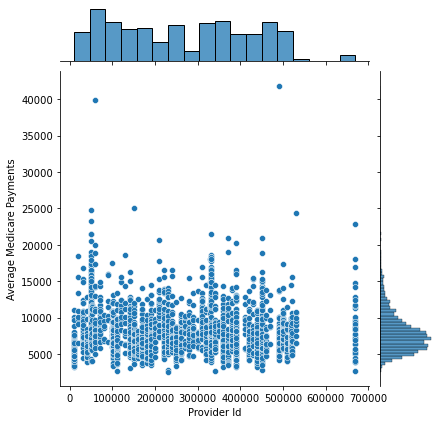

In [102]:
sns.jointplot(x='Provider Id', y='Average Medicare Payments', data=a2)

In [103]:
model = LinearRegression()
model.fit(a2['Provider Id'].values.reshape(-1,1),a2['Average Medicare Payments'].values.reshape(-1,1))

LinearRegression()

In [104]:
a2['Predicted']=model.predict(a2['Provider Id'].values.reshape(-1,1))
a2['Residual']=abs(a2['Predicted']-a2['Average Medicare Payments'])

In [105]:
#Details Concerning Required Providers
a2.sort_values('Residual',ascending=False).head(3)

,Provider Id,Average Medicare Payments,Predicted,Residual
3143,490142,41836.888890,7483.163626,34353.725264
540,60096,39943.173080,8420.791989,31522.381091
3295,530015,24350.493057,7396.228611,16954.264446


In [106]:
#For outpatient
a3=outpatient[['Provider Id','Average Total Payments']].groupby('Provider Id').mean().reset_index()
a3.head()

,Provider Id,Average Total Payments
0,10001,285.699426
1,10005,254.564837
2,10006,221.871666
3,10007,251.371890
4,10008,207.481575


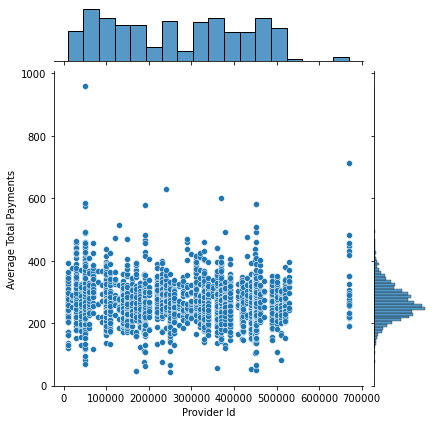

In [107]:
sns.jointplot(x='Provider Id', y='Average Total Payments', data=a3)

In [108]:
model2 = LinearRegression()
model2.fit(a3['Provider Id'].values.reshape(-1,1),a3['Average Total Payments'].values.reshape(-1,1))

LinearRegression()

In [109]:
a3['Predicted']=model2.predict(a3['Provider Id'].values.reshape(-1,1))
a3['Residual']=abs(a3['Predicted']-a3['Average Total Payments'])

In [110]:
#Details Concerning Required Providers
a3.sort_values('Residual',ascending=False).head(3)

,Provider Id,Average Total Payments,Predicted,Residual
432,50714,960.595632,275.415810,685.179823
3134,670061,712.396480,252.954963,459.441517
1474,240069,629.085289,268.548781,360.536508


In [111]:
#Part2: B: Regions Least Like Others


In [112]:
#For inpatient
b2=inpatient[['Provider State','Average Medicare Payments']].groupby('Provider State').mean().reset_index()
b2['State_col']=b2.index
b2.head()

,Provider State,Average Medicare Payments,State_col
0,AK,12958.973677,0
1,AL,6418.011329,1
2,AR,6919.725054,2
3,AZ,8825.721445,3
4,CA,11494.385763,4


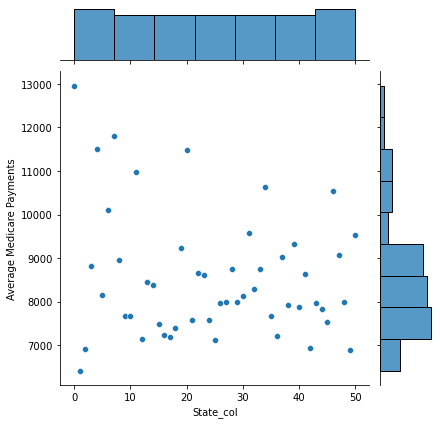

In [113]:
sns.jointplot(x='State_col', y='Average Medicare Payments', data=b2)

In [114]:
model = LinearRegression()
model.fit(b2['State_col'].values.reshape(-1,1),b2['Average Medicare Payments'].values.reshape(-1,1))

LinearRegression()

In [115]:
b2['Predicted']=model.predict(b2['State_col'].values.reshape(-1,1))
b2['Residual']=abs(b2['Predicted']-b2['Average Medicare Payments'])

In [116]:
#Details Concerning Required States
b2.sort_values('Residual',ascending=False).head(3)

,Provider State,Average Medicare Payments,State_col,Predicted,Residual
0,AK,12958.973677,0,8960.607913,3998.365764
7,DC,11811.972137,7,8843.385320,2968.586816
20,MD,11480.126155,20,8625.686221,2854.439934


In [117]:
#For outpatients
b3=outpatient[['Provider State','Average Total Payments']].groupby('Provider State').mean().reset_index()
b3['State_col']=b3.index

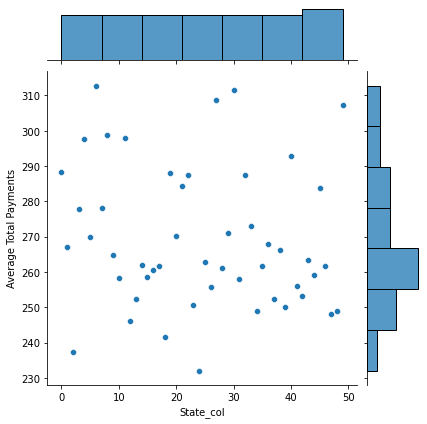

In [118]:
sns.jointplot(x='State_col', y='Average Total Payments', data=b3)

In [119]:
model = LinearRegression()
model.fit(b3['State_col'].values.reshape(-1,1), b3['Average Total Payments'].values.reshape(-1,1))

LinearRegression()

In [120]:
b3['Predicted']=model.predict(b3['State_col'].values.reshape(-1,1))
b3['Residual']=abs(b3['Predicted']-b3['Average Total Payments'])

In [121]:
#Details Concerning Required States
b3.sort_values('Residual',ascending=False).head(3)

,Provider State,Average Total Payments,State_col,Predicted,Residual
30,NJ,311.496332,30,268.030556,43.465776
49,WY,307.213348,49,264.300992,42.912357
6,CT,312.802783,6,272.741585,40.061198


# Part3: Identify 10000 Medicare patients who are involved in anomalous activities

In [122]:
history=pd.read_csv("Patient_history_samp.csv")
history.head()

,id,age,gender,income
0,306535165,65-74,F,24000-31999
1,742231134,65-74,F,48000+
2,928807201,75-84,M,24000-31999
3,83686538,<65,F,32000-47999
4,755607449,65-74,F,48000+


In [123]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      500000 non-null  int64 
 1   age     497470 non-null  object
 2   gender  500000 non-null  object
 3   income  497469 non-null  object
dtypes: int64(1), object(3)
memory usage: 15.3+ MB


In [124]:
history.describe()

,id
count,5.000000e+05
mean,5.001562e+08
std,2.884206e+08
min,7.561000e+03
25%,2.505402e+08
50%,5.001085e+08
75%,7.495556e+08
max,9.999957e+08


In [125]:
trans=pd.read_csv("Transaction_coo.csv")
trans.head()

,id,global_proc_id,count
0,159125,1,1
1,191852,1,1
2,321083,1,1
3,383037,1,1
4,467729,1,1


In [126]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514809 entries, 0 to 1514808
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   id              1514809 non-null  int64
 1   global_proc_id  1514809 non-null  int64
 2   count           1514809 non-null  int64
dtypes: int64(3)
memory usage: 34.7 MB


In [127]:
trans.describe()

,id,global_proc_id,count
count,1.514809e+06,1.514809e+06,1514809.0
mean,5.000708e+08,3.847588e+01,1.0
std,2.883678e+08,3.123966e+01,0.0
min,7.561000e+03,1.000000e+00,1.0
25%,2.504427e+08,2.200000e+01,1.0
50%,4.999363e+08,2.600000e+01,1.0
75%,7.493563e+08,4.200000e+01,1.0
max,9.999957e+08,1.300000e+02,1.0


In [128]:
history.age=history.age.fillna(history.age.mode()[0])     #values; replacing them with mode
history.income=history.income.fillna(history.income.mode()[0]) 

In [129]:
trans=trans[['id','count']].groupby('id').sum()

In [130]:
history.set_index('id',inplace=True)

In [131]:
#Combining transactional information, trans and history data set, to form "ht" which will form base table

In [132]:
ht=pd.concat([trans,history],join='inner',axis=1)

In [133]:
ht.head()

,count,age,gender,income
id,,,,
7561,2,65-74,M,48000+
7619,2,<65,F,48000+
10479,4,65-74,F,<16000
13515,2,75-84,M,<16000
15213,6,85+,M,32000-47999


In [134]:
ht.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 7561 to 999995713
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   count   500000 non-null  int64 
 1   age     500000 non-null  object
 2   gender  500000 non-null  object
 3   income  500000 non-null  object
dtypes: int64(1), object(3)
memory usage: 19.1+ MB


In [135]:
ht.describe()

,count
count,500000.000000
mean,2.999536
std,1.416457
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,13.000000


In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
#Creating dummy variables 
columns=['age','gender','income']
for i in columns:
    dummy = pd.get_dummies(ht[i], prefix=i)
    ht= pd.concat([ht, dummy], axis=1)
    ht.drop(i,axis=1,inplace=True)

In [138]:
ht1=StandardScaler().fit_transform(ht)

In [139]:
ht2=pd.DataFrame(ht1)
ht2.columns=ht.columns
ht2.index=ht.index

In [140]:
ht2.head()

,count,age_65-74,age_75-84,age_85+,age_<65,gender_F,gender_M,income_16000-23999,income_24000-31999,income_32000-47999,income_48000+,income_<16000
id,,,,,,,,,,,,
7561,-0.705660,1.119680,-0.589644,-0.385122,-0.451183,-1.103364,1.103364,-0.507776,-0.422289,-0.487149,1.795304,-0.523474
7619,-0.705660,-0.893112,-0.589644,-0.385122,2.216394,0.906319,-0.906319,-0.507776,-0.422289,-0.487149,1.795304,-0.523474
10479,0.706315,1.119680,-0.589644,-0.385122,-0.451183,0.906319,-0.906319,-0.507776,-0.422289,-0.487149,-0.557009,1.910315
13515,-0.705660,-0.893112,1.695939,-0.385122,-0.451183,-1.103364,1.103364,-0.507776,-0.422289,-0.487149,-0.557009,1.910315
15213,2.118289,-0.893112,-0.589644,2.596578,-0.451183,-1.103364,1.103364,-0.507776,-0.422289,2.052759,-0.557009,-0.523474


In [141]:
from sklearn.neighbors import LocalOutlierFactor
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression

In [142]:
ht3=LocalOutlierFactor(n_neighbors=50,n_jobs=-1,contamination=0.002)

In [143]:
ht4=ht3.fit_predict(ht2)

In [144]:
label=pd.DataFrame(ht4)
label.index=ht2.index
label.columns=['label']

In [145]:
label.label.value_counts()

 1    499011
-1       989
Name: label, dtype: int64

In [146]:
htf=ht2[label.label==-1]

In [147]:
#Required list of people involved in malicious activities
htf

,count,age_65-74,age_75-84,age_85+,age_<65,gender_F,gender_M,income_16000-23999,income_24000-31999,income_32000-47999,income_48000+,income_<16000
id,,,,,,,,,,,,
1552051,4.236251,-0.893112,-0.589644,2.596578,-0.451183,0.906319,-0.906319,-0.507776,-0.422289,-0.487149,-0.557009,1.910315
2385395,4.942239,-0.893112,1.695939,-0.385122,-0.451183,0.906319,-0.906319,1.969373,-0.422289,-0.487149,-0.557009,-0.523474
2462212,3.530264,-0.893112,-0.589644,2.596578,-0.451183,-1.103364,1.103364,1.969373,-0.422289,-0.487149,-0.557009,-0.523474
2673778,3.530264,-0.893112,-0.589644,2.596578,-0.451183,-1.103364,1.103364,-0.507776,-0.422289,-0.487149,-0.557009,1.910315
2777478,3.530264,-0.893112,1.695939,-0.385122,-0.451183,-1.103364,1.103364,-0.507776,2.368045,-0.487149,-0.557009,-0.523474
...,...,...,...,...,...,...,...,...,...,...,...,...
996449832,3.530264,-0.893112,1.695939,-0.385122,-0.451183,0.906319,-0.906319,-0.507776,2.368045,-0.487149,-0.557009,-0.523474
996803072,3.530264,-0.893112,-0.589644,-0.385122,2.216394,-1.103364,1.103364,-0.507776,-0.422289,-0.487149,-0.557009,1.910315
997414065,3.530264,-0.893112,-0.589644,2.596578,-0.451183,0.906319,-0.906319,-0.507776,-0.422289,2.052759,-0.557009,-0.523474
